<a href="https://colab.research.google.com/github/sfwathen/lab-1-phase-2-brendencrogers/blob/main/Copy_of_DATA_301_Lab_1A_Sam_Wathen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1. I would predict that roughly 11% of values have a first digit of 1, as well as 11% fir 9 as the first digit. I base this off the fact that any given number is entirely random so there should be an even distribution of first and last digits. the 11% comes from 1/9

2. Unlike the question, I would predict that roughly only about 9-10% of numbers have 1 as the last digit, while 12-13% have 9 as the last digit. This is a bit of a bargain as it makes sense for the last digit to be just as evenly distributed as the first digit. However, I find that a lot of real data has 9s in the last digit, such as prices for items being 5.99 instead of 6. To account for this, I took a percentage point or two from 1, which in my experience is less common, and I gave it to 9. 

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")

df_sp500.set_index("Name", inplace=True)

df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**ENTER YOUR WRITTEN EXPLANATION HERE.**

The unit of observation for this data set is a stock and its trading information on 2018-02-01. Because of this, it makes sense to have the stock name be the index as that best represents each observational unit. 

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

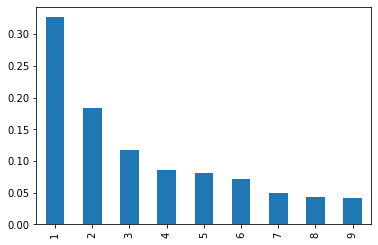

In [ ]:
df_string_volume = df_sp500["volume"].astype("string")

df_first = df_string_volume.str.get(0)

first_probs = df_first.value_counts(normalize=True)

first_probs.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

This is super far from what I predicted, the first digits definitely tend to skew towards the lower digits. In this context it makes sense for there to be some skew, as volume amounts will tend to be lower in any given power of 10, but the drastic difference is surprising to me. 

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

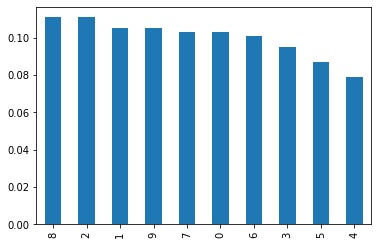

In [ ]:
df_string_volume = df_sp500["volume"].astype("string")

df_last = df_string_volume.str.strip().str[-1]

last_probs = df_last.value_counts(normalize=True)

last_probs.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

This distribution makes much more sense to me and is more in line with my prediction form question 0, though it is still not as I predicted. It makes sense for last digits to be more evenly distributed because this is the volume section and it isn't subject to the pricing differences that I predicted originally. 

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

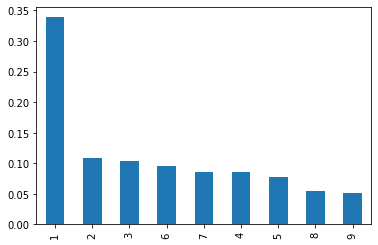

In [ ]:
df_string_volume = df_sp500["close"].astype("string")

df_first_close = df_string_volume.str.get(1)

first_close_probs = df_first_close.value_counts(normalize=True)

first_close_probs.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

This data shows that first digits for closing price are overwhelmingly 1, which is in line with the volume trends that we saw earlier. Again it is not at all as I predicted at the start, I thought things would be much more evenly distributed.